In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import nltk
from ast import literal_eval
from wordcloud import WordCloud
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords

# import required libraries

In [2]:
#load data files

reviews_df = pd.read_csv('../Assets/reviews_200p_cleaned.csv')
titles_df = pd.read_csv('../Assets/titles_200p_cleaned.csv')
users_df = pd.read_csv('../Assets/users_200p_cleaned.csv')

In [3]:
reviews_df.head()

,review_id,title_id,title_english,title_romaji,user_id,score,rating,ratingCount,text_summary,text_body,lang,text_body_cleaned,text_body_cleaned_token
0,2791,30002,Berserk,Berserk,127937,85,23,53,This would be the first time i try tackling a ...,"Alrightee alrightee alrightee, here is my bers...",en,Alrightee alrightee alrightee berserk review f...,"['berserk', 'review', 'first', 'review', 'real..."
1,3811,30002,Berserk,Berserk,118781,100,191,208,One person's thoughts on one man's masterpiece.,This review contains spoilers.\n\nWhen one thi...,en,This review contains spoilers When one thinks ...,"['review', 'contains', 'spoilers', 'one', 'thi..."
2,11421,30002,Berserk,Berserk,403142,100,480,510,A Timeless and Peerless Masterpiece - The Grea...,# ~~~___A Timeless and Peerless Masterpiece - ...,en,A Timeless Peerless Masterpiece The Greatest M...,"['first', 'part', 'review', 'read', 'spoiler',..."
3,11781,30002,Berserk,Berserk,63817,100,90,97,This wasn't how any of us wanted it to go. Nev...,~~~img(https://i.imgur.com/2jXWSu7.png)~~~\n\n...,en,img https imgur com jXWSu png This review goin...,"['https', 'com', 'j', 'png', 'review', 'going'..."
4,12405,30002,Berserk,Berserk,5435290,60,16,146,"Short {RECORDBREAKING, TURBOHYPE, GIGACHAD} Go...",I will try be as short as possible. Feel free ...,en,I try short possible Feel free ask questions w...,"['try', 'short', 'possible', 'free', 'ask', 'q..."


In [4]:
reviews_df[['score', 'rating', 'ratingCount']].describe()

,score,rating,ratingCount
count,8221.000000,8221.000000,8221.000000
mean,77.410656,36.794915,54.275514
std,20.896150,44.823116,74.863887
min,0.000000,1.000000,1.000000
25%,70.000000,14.000000,20.000000
50%,82.000000,25.000000,35.000000
75%,92.000000,43.000000,60.000000
max,100.000000,943.000000,1923.000000


In [5]:
reviews_df.loc[:, ~reviews_df.columns.isin(['review_id', 'title_id'])].groupby('title_romaji').mean().sort_values('rating', ascending=False)

,score,rating,ratingCount
title_romaji,,,
PUPARIA,78.000000,193.0,201.000000
Sabishisugite Rezu Fuzoku ni Ikimashita Report,100.000000,172.0,181.000000
Pingu in the City,83.500000,146.5,159.500000
Uramichi Oniisan,95.000000,140.0,142.000000
Gintama°,95.666667,125.0,134.333333
...,...,...,...
Shinobi Life,55.000000,1.5,1.500000
Yeongwonhan Neoui Geojinmal,100.000000,1.0,2.000000
Old Boy,60.000000,1.0,7.000000


In [6]:
titles_df = titles_df[titles_df.adult==False]
# Filtered out adult content for the purpose of this analysis
titles_df.head()

,title_id,title_english,title_romaji,type,duration,start_year,chapters,volume,publishing_status,country,...,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,title_romaji_type,synopsis_cleaned,synopsis_source,synopsis_wc,synopsis_cleaned_token
0,30002,Berserk,Berserk,MANGA,NaN,1989.0,NaN,NaN,RELEASING,JP,...,0,0,0,0,0,Berserk_MANGA,His name Guts Black Swordsman feared warrior s...,Dark Horse,425,"['name', 'feared', 'warrior', 'spoken', 'whisp..."
1,31706,NaN,JoJo no Kimyou na Bouken: Steel Ball Run,MANGA,NaN,2004.0,95.0,24.0,FINISHED,JP,...,0,0,1,1,0,JoJo no Kimyou na Bouken: Steel Ball Run_MANGA,Originally presented unrelated story series la...,Wikipedia,346,"['presented', 'unrelated', 'story', 'series', ..."
2,114129,Gintama: THE VERY FINAL,Gintama: THE FINAL,ANIME,104.0,2021.0,NaN,NaN,FINISHED,JP,...,1,0,0,0,0,Gintama: THE FINAL_ANIME,Gintama THE FINAL rd final film adaptation rem...,no match,82,"['rd', 'final', 'film', 'adaptation', 'remaind..."
3,30013,One Piece,ONE PIECE,MANGA,NaN,1997.0,NaN,NaN,RELEASING,JP,...,0,0,0,0,0,ONE PIECE_MANGA,As child Monkey D Luffy inspired become pirate...,Viz Media,348,"['child', 'inspired', 'become', 'pirate', 'lis..."
4,124194,Fruits Basket The Final Season,Fruits Basket: The Final,ANIME,24.0,2021.0,NaN,NaN,FINISHED,JP,...,0,1,0,1,0,Fruits Basket: The Final_ANIME,After last season revelations Soma family move...,Funimation,277,"['last', 'season', 'revelations', 'family', 'm..."


In [7]:
titles_df.groupby('type').mean()

# ANIME seems to be more popular in general.  However, Manga has higher mean score compared to anime.
# This is within expectation, given i) anime is likely to have better exposure both domestically and globally
# 2) manga tends to be seem as the "original material" and subjected to less/no future edits, such as edits during 
# localization of anime oversea

# This is also why a work may have multiple anime and manga entries as they can
# i) with multiple releases/seasons with different production companies/teams
# ii) variation of plots and stories that they are considered different work.

,title_id,duration,start_year,chapters,volume,adult,average_score,mean_score,popularity,favorites,...,Music,Mystery,Psychological,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,synopsis_wc
type,,,,,,,,,,,,,,,,,,,,,
ANIME,43304.367233,34.721394,2011.402284,NaN,NaN,0.0,71.775093,72.756506,31963.050717,939.314657,...,0.055497,0.105682,0.077005,0.224110,0.186405,0.229156,0.069570,0.172597,0.029209,315.139140
MANGA,84752.676157,NaN,2012.121023,62.911635,7.783744,0.0,70.961744,75.027802,4174.161699,216.042260,...,0.011788,0.099644,0.105649,0.520907,0.072509,0.255783,0.031139,0.173488,0.021797,306.180827


In [8]:
titles_df.loc[:, ~titles_df.columns.isin(['review_id', 'title_id'])].groupby('title_romaji').mean().sort_values('mean_score', ascending=False)

,duration,start_year,chapters,volume,adult,average_score,mean_score,popularity,favorites,score_10,...,Music,Mystery,Psychological,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,synopsis_wc
title_romaji,,,,,,,,,,,,,,,,,,,,,
Fata Morgana no Yakata: Anata no Genten ni Itaru Monogatari,NaN,2014.0,21.0,5.0,0.0,87.0,93.0,1371.0,322.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1178.0
Koimonogatari,NaN,2011.0,39.0,1.0,0.0,85.0,93.0,871.0,85.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,702.0
Berserk,NaN,1989.0,NaN,NaN,0.0,93.0,93.0,116265.0,21566.0,495.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,425.0
Bungou Stray Dogs: STORM BRINGER,NaN,2021.0,6.0,1.0,0.0,79.0,92.0,1384.0,67.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,289.0
Gintama: THE FINAL,104.0,2021.0,NaN,NaN,0.0,92.0,92.0,23496.0,1804.0,110.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tengen Toppa Gurren Lagann: Ore no Gurren wa Pikka-Pika!!,12.0,2007.0,NaN,NaN,0.0,64.0,64.0,7412.0,32.0,23.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,168.0
number24,24.0,2020.0,NaN,NaN,0.0,64.0,64.0,15208.0,172.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,401.0
Brave Witches,24.0,2016.0,NaN,NaN,0.0,64.0,64.0,10224.0,66.0,57.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,67.0


In [9]:
# Title_romanji is used instead of title_english because
# 1) all Japanese titles always have a romanji title.  Romanji is the romanization of the Japanese language using Latin script
# since the website/data source is based in Japan, a romanji name is expected to assign to all non-Japanese title.  
# 2) Romanji titles tend to be phonetic representation of non-Japanese titles.
# 3) title_english can be either official names of a Title or oversea translated/dubbed title names, which can be seem as less accurate

In [10]:
titles_df[['duration', 'chapters', 'volume', 'average_score', 'mean_score', 'popularity', 'favorites']].describe()

#duration/chapters/volume has a minimum value of 1.  This may suggest there are titles that have
# 1) short-stories that are completed with 1 release
# 2) titles/test titles that are only able to run for single publication (limited publication, etc).

# popularity/favorites distribution showsn that max values are noticably much higher than 25%/50%/75% percentile values
# this suggests reception/populatity of titles increase exponentially and has skewed distributions.   
# manga artists/company may also face a "lottery payoff" scenario (top participants get paid much more than average)

,duration,chapters,volume,average_score,mean_score,popularity,favorites
count,3758.000000,3180.000000,2719.000000,8262.000000,8262.000000,8262.000000,8262.000000
mean,34.721394,62.911635,7.783744,71.332486,73.992496,16840.944081,545.725611
std,30.310334,89.845854,9.088860,5.292437,5.110231,41471.153582,2217.127083
min,1.000000,1.000000,1.000000,64.000000,64.000000,140.000000,0.000000
25%,23.000000,10.000000,2.000000,67.000000,70.000000,1393.000000,22.000000
50%,24.000000,34.000000,4.000000,70.000000,73.000000,3530.500000,58.000000
75%,28.000000,80.000000,11.000000,74.000000,77.000000,12290.000000,220.000000
max,168.000000,1126.000000,78.000000,93.000000,93.000000,587454.000000,54437.000000


In [11]:
users_df.head()

,user_id,about,avatar,about_lang,about_cleaned,about_cleaned_token
0,1,Admin of this site and AniChart.net.\n\n__I no...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,Admin site AniChart net I longer handle data c...,"['site', 'net', 'longer', 'handle', 'data', 'c..."
1,2,__he/him â¢ Lead Community Mod & Developer__\...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,Lead Community Mod Developer I watch anime ins...,"['watch', 'anime', 'instead', 'working', 'http..."
2,6,Hey there! Welcome to my profile!\r\nMy name i...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,Hey Welcome profile My name Richard I male age...,"['profile', 'name', 'male', 'age', 'food', 'pi..."
3,7,I write about anime on my blog: http://jamieja...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,I write anime blog http jamiejakov,"['write', 'anime', 'blog', 'http']"
4,8,I'll do this later. ><,https://s4.anilist.co/file/anilistcdn/user/ava...,en,I later,['later']


In [12]:
#1r = LinearRegression()
#Ir.fit(X_train, y_train)

titles_lr = LinearRegression()

titles_X_train = titles_df[[ 'Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi', 'Fantasy', 'Hentai',
        'Horror', 'Mahou Shoujo', 'Mecha', 'Music', 'Mystery', 'Psychological',
       'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural',
       'Thriller']]

titles_y_train = titles_df['average_score']
titles_lr.fit(titles_X_train, titles_y_train)

#titles_df.columns

print(titles_lr.coef_)

[ 1.30721759e+00  8.61338419e-01  8.54149552e-01  2.06804792e+00
 -1.76818890e+00  4.96616609e-01  2.22044605e-16 -1.37770540e+00
 -8.39345750e-01 -3.06979912e-01  1.50457620e+00  1.58130289e+00
  2.24435637e+00 -1.84837514e-01  3.79319538e-01  2.03597372e+00
  2.20759240e+00  1.14417323e+00  1.88631944e+00]


In [13]:
titles_X_train = titles_df[[ 'Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi', 'Fantasy', 
        'Horror', 'Mahou Shoujo', 'Mecha', 'Music', 'Mystery', 'Psychological',
       'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural',
       'Thriller']]

titles_y_train = titles_df['average_score']

X2 = sm.add_constant(titles_X_train)
titles_est = sm.OLS(titles_y_train, X2)
titles_est2 = titles_est.fit()
print(titles_est2.summary())

                            OLS Regression Results                            
Dep. Variable:          average_score   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     63.26
Date:                Sun, 14 Aug 2022   Prob (F-statistic):          2.45e-215
Time:                        10:27:01   Log-Likelihood:                -24955.
No. Observations:                8262   AIC:                         4.995e+04
Df Residuals:                    8243   BIC:                         5.008e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            68.4663      0.150    457.470

In [14]:
reviews_df.columns

Index(['review_id', 'title_id', 'title_english', 'title_romaji', 'user_id',
       'score', 'rating', 'ratingCount', 'text_summary', 'text_body', 'lang',
       'text_body_cleaned', 'text_body_cleaned_token'],
      dtype='object')

In [15]:
reviews_df_02 = reviews_df
reviews_df_02['text_body_cleaned_token'] = reviews_df_02['text_body_cleaned_token'].apply(literal_eval)
reviews_df_02 = reviews_df_02.explode('text_body_cleaned_token')
reviews_df_02['text_body_cleaned_token'].value_counts()


like            35192
one             32317
characters      32157
show            31945
anime           31196
                ...  
diminishment        1
convertible         1
villas              1
organises           1
eine                1
Name: text_body_cleaned_token, Length: 29185, dtype: int64

In [16]:
titles_df_02 = titles_df
titles_df_02['synopsis_cleaned_token'] = titles_df_02['synopsis_cleaned_token'].apply(literal_eval)
titles_df_02 = titles_df_02.explode('synopsis_cleaned_token')
titles_df_02['synopsis_cleaned_token'].value_counts()


school        2356
one           2120
world         2091
life          2032
new           1649
              ... 
province         1
nook             1
legitimate       1
disagrees        1
bowl             1
Name: synopsis_cleaned_token, Length: 15456, dtype: int64

In [17]:
users_df_02 = users_df
users_df_02['about_cleaned_token'] = users_df_02['about_cleaned_token'].apply(literal_eval)
users_df_02 = users_df_02.explode('about_cleaned_token')
users_df_02['about_cleaned_token'].value_counts()

anime       982
com         560
https       542
http        430
like        330
           ... 
selling       1
athletic      1
blown         1
ears          1
five          1
Name: about_cleaned_token, Length: 4110, dtype: int64

In [18]:
# create a list of stopwords
nltk.download('stopwords')
stops = set(stopwords.words('english'))
print(stops)

{'isn', 'all', 'now', 'if', 'to', 'only', 'any', 'herself', "mightn't", "wasn't", 'too', 'where', 'this', "couldn't", 'with', 'how', 'do', "didn't", 'who', 'against', 'hasn', 'why', 's', 'is', 'be', 'once', 'you', 'that', 'd', 'of', 'there', "that'll", "don't", 'ma', 'under', 'have', 'doesn', 'shan', 'having', 'will', 'ain', 'didn', 'before', "weren't", 'again', 'a', 'has', 'them', 'above', 'so', 't', 'should', 'been', 'theirs', 'shouldn', "hadn't", "hasn't", 'its', 'or', 'mustn', "you'd", 'their', 'our', 'about', 'up', 'other', 'own', 'just', "haven't", 'which', 'nor', 'did', "needn't", 'were', 'very', 'm', 'hers', "shan't", "isn't", 'don', 'whom', 'what', 'him', 'below', 'not', 'through', 'his', 'himself', 'more', 'her', 'does', 'she', 'o', 'most', 'haven', 'we', "should've", "doesn't", 'the', 'each', 'an', "shouldn't", 'won', 'such', 'out', 'being', 'am', "won't", 've', 'itself', "you're", 'but', 'yourselves', 'by', 'on', 'was', "it's", 'i', 'your', 'into', 'my', "wouldn't", 'he', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Granzon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


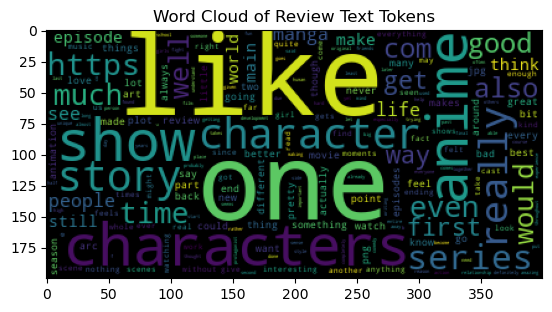

In [19]:
reviews_wordcloud = WordCloud(stopwords=stops).generate_from_frequencies(reviews_df_02['text_body_cleaned_token'].value_counts(normalize=True))
plt.imshow(reviews_wordcloud)
plt.title('Word Cloud of Review Text Tokens')
plt.show(reviews_wordcloud)

# This word cloud shows that “character” and “story” are text tokens that are likely to be included in review text, 
#suggesting that these are important elements for users to construct their reviews.


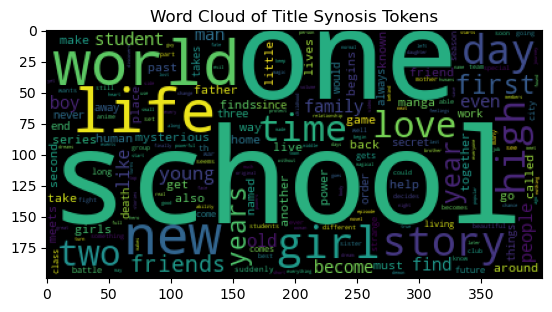

In [20]:
titles_wordcloud = WordCloud(stopwords=stops).generate_from_frequencies(titles_df_02['synopsis_cleaned_token'].value_counts(normalize=True))
plt.imshow(titles_wordcloud)
plt.title('Word Cloud of Title Synosis Tokens')
plt.show(titles_wordcloud)

# titles synopsis: school seems to be a keyword that appears a lot.  This may suggest a good number of anime/manage has a school setting where the story takes place.
# 
#This word cloud shows that “school”, “life” and “world” are some of the most common words in the title synopsis.  
#Given the “coming-to-age” theme/story structure is common among anime and manga, there are large numbers of work that may have the story begin in a school setting.  
#Fiction and science fiction also tends to construct their own world views so that may also explain why “word” is a frequent token.


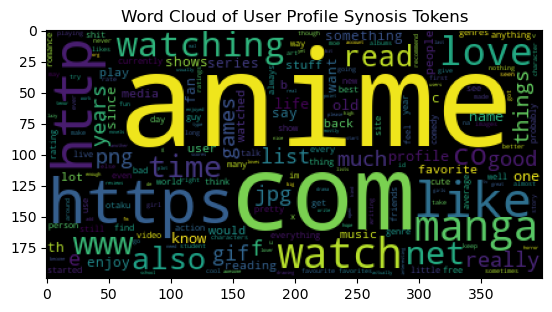

In [21]:
users_wordcloud = WordCloud(stopwords=stops).generate_from_frequencies(users_df_02['about_cleaned_token'].value_counts(normalize=True))
plt.imshow(users_wordcloud)
plt.title('Word Cloud of User Profile Synosis Tokens')
plt.show(users_wordcloud)

# Users profiles have "anime", "manga" and "watching" as some of the most frequently used words.
# items such https, com, gif, png also appear frequently.  This suggests users may like to link website and pictures (e.g. gif/png) in the profile to highlight certain information about themselves.

In [22]:
# Titles word count by types
#[ 'Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi', 'Fantasy', 
#        'Horror', 'Mahou Shoujo', 'Mecha', 'Music', 'Mystery', 'Psychological',
#       'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural',
#       'Thriller']

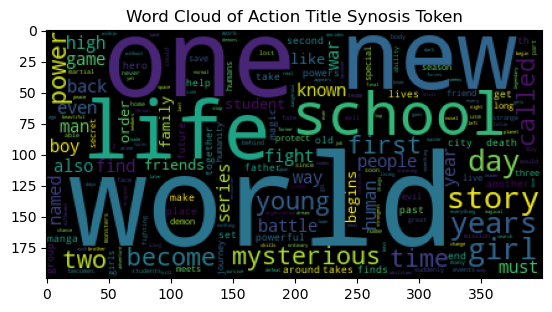

In [23]:
titles_df_action = titles_df_02[titles_df_02['Action']==1]
titles_wordcloud_action = WordCloud(stopwords=stops).generate_from_frequencies(titles_df_action['synopsis_cleaned_token'].value_counts(normalize=True))
plt.imshow(titles_wordcloud_action)
plt.title('Word Cloud of Action Title Synosis Token')
plt.show(titles_wordcloud_action)

# "world" is most frequent compared to "school" when all categories are inclued

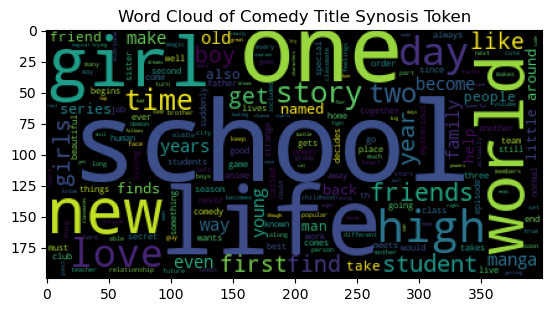

In [24]:
titles_df_comedy = titles_df_02[titles_df_02['Comedy']==1]
titles_wordcloud_comedy = WordCloud(stopwords=stops).generate_from_frequencies(titles_df_comedy['synopsis_cleaned_token'].value_counts(normalize=True))
plt.imshow(titles_wordcloud_comedy)
plt.title('Word Cloud of Comedy Title Synosis Token')
plt.show(titles_wordcloud_comedy)

# "school" and "life" seem to have the highest weight

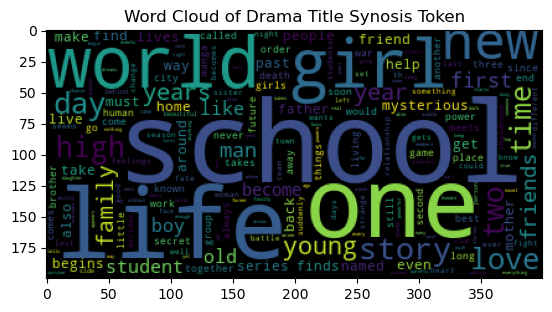

In [25]:
titles_df_drama = titles_df_02[titles_df_02['Drama']==1]
titles_wordcloud_drama = WordCloud(stopwords=stops).generate_from_frequencies(titles_df_drama['synopsis_cleaned_token'].value_counts(normalize=True))
plt.imshow(titles_wordcloud_drama)
plt.title('Word Cloud of Drama Title Synosis Token')
plt.show(titles_wordcloud_drama)

# "school" is also most frequent compared to "school" when all categories are included

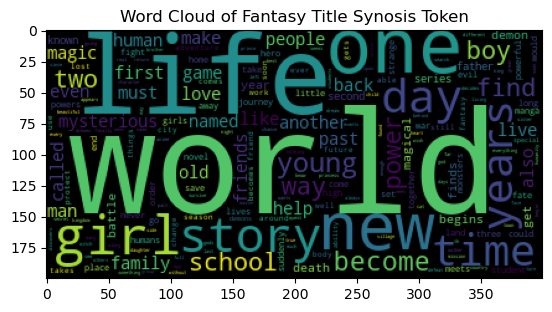

In [26]:
titles_df_fantasy = titles_df_02[titles_df_02['Fantasy']==1]
titles_wordcloud_fantasy = WordCloud(stopwords=stops).generate_from_frequencies(titles_df_fantasy['synopsis_cleaned_token'].value_counts(normalize=True))
plt.imshow(titles_wordcloud_fantasy)
plt.title('Word Cloud of Fantasy Title Synosis Token')
plt.show(titles_wordcloud_fantasy)

# "world" and "life" most frequent

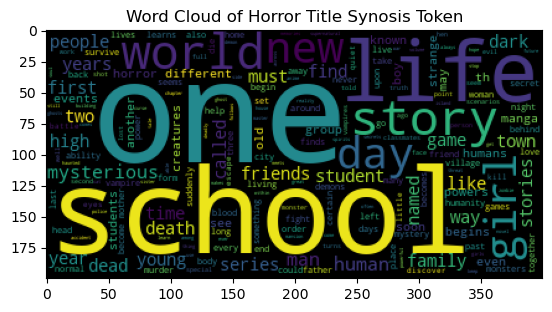

In [27]:
titles_df_horror = titles_df_02[titles_df_02['Horror']==1]
titles_wordcloud_horror = WordCloud(stopwords=stops).generate_from_frequencies(titles_df_horror['synopsis_cleaned_token'].value_counts(normalize=True))
plt.imshow(titles_wordcloud_horror)
plt.title('Word Cloud of Horror Title Synosis Token')
plt.show(titles_wordcloud_horror)

# "school" is also most frequent compared to "school" when all categories are included.  "Mysterious" is also visible

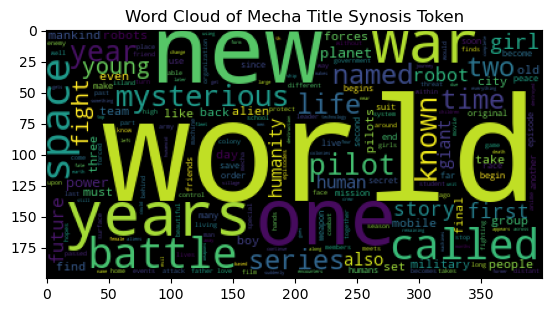

In [28]:
titles_df_mecha = titles_df_02[titles_df_02['Mecha']==1]
titles_wordcloud_mecha = WordCloud(stopwords=stops).generate_from_frequencies(titles_df_mecha['synopsis_cleaned_token'].value_counts(normalize=True))
plt.imshow(titles_wordcloud_mecha)
plt.title('Word Cloud of Mecha Title Synosis Token')
plt.show(titles_wordcloud_mecha)

# Words such as "future", "robot", "war", "space" are more visible.

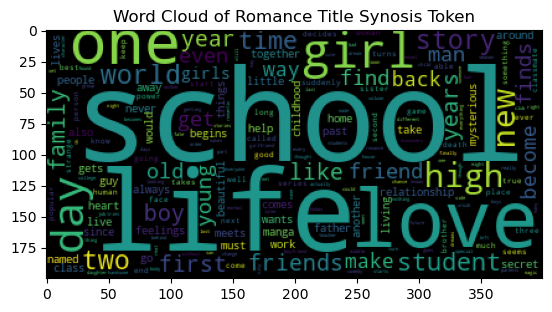

In [29]:
titles_df_romance = titles_df_02[titles_df_02['Romance']==1]
titles_wordcloud_romance = WordCloud(stopwords=stops).generate_from_frequencies(titles_df_romance['synopsis_cleaned_token'].value_counts(normalize=True))
plt.imshow(titles_wordcloud_romance)
plt.title('Word Cloud of Romance Title Synosis Token')
plt.show(titles_wordcloud_romance)

# "School", "life", "love" are some of the most used words.

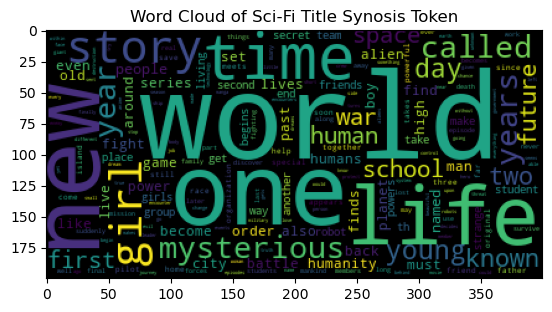

In [30]:
titles_df_sci_fi = titles_df_02[titles_df_02['Sci-Fi']==1]
titles_wordcloud_sci_fi = WordCloud(stopwords=stops).generate_from_frequencies(titles_df_sci_fi['synopsis_cleaned_token'].value_counts(normalize=True))
plt.imshow(titles_wordcloud_sci_fi)
plt.title('Word Cloud of Sci-Fi Title Synosis Token')
plt.show(titles_wordcloud_sci_fi)

# "world", "new", "time", "mysterious" are also frequent compared to "school" when all categories are incloded.

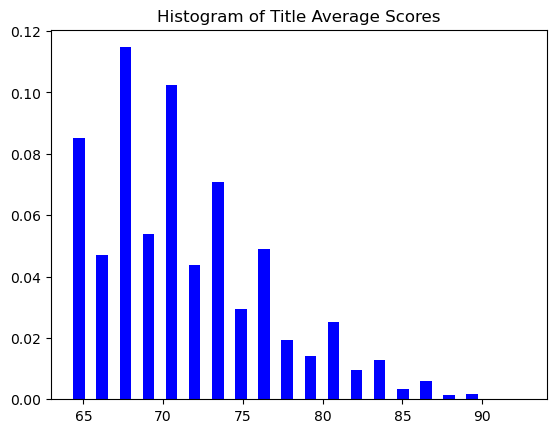

In [31]:
plt.hist(x=titles_df['average_score'], bins=20, density = 1, color = 'blue', rwidth=0.5)
plt.title('Histogram of Title Average Scores')
plt.show()

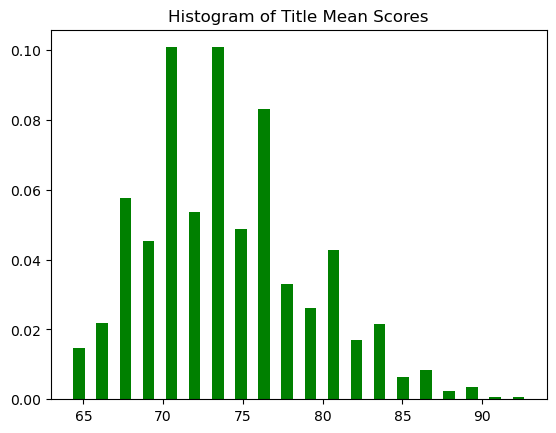

In [32]:
plt.hist(x=titles_df['mean_score'], bins=20, density = 1, color = 'green', rwidth=0.5)
plt.title('Histogram of Title Mean Scores')
plt.show()

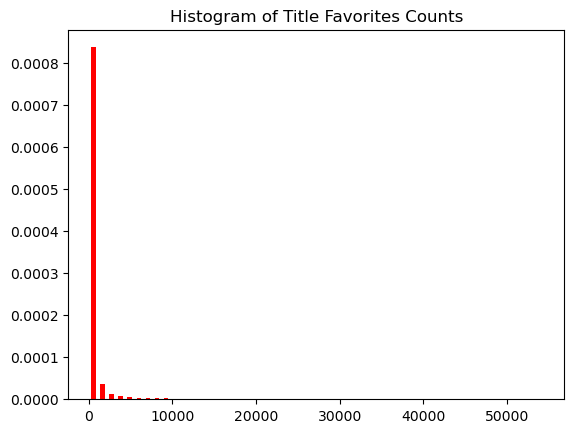

In [33]:
plt.hist(x=titles_df['favorites'], bins=50, density = 1, color = 'red', rwidth=0.5)
plt.title('Histogram of Title Favorites Counts')
plt.show()

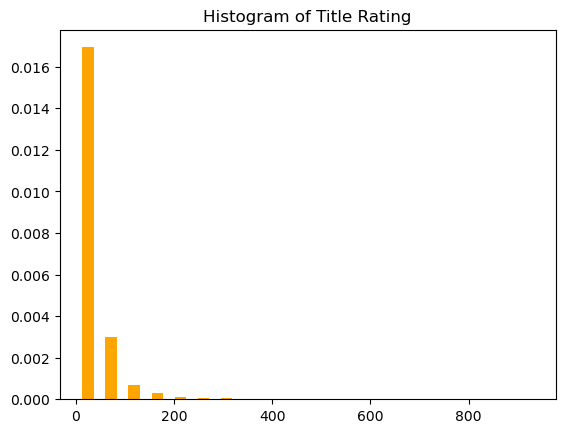

In [34]:
plt.hist(x=reviews_df['rating'], bins=20, density = 1, color = 'orange', rwidth=0.5)
plt.title('Histogram of Title Rating')
plt.show()

In [35]:
titles_df_ts = titles_df.groupby('start_year').sum()
titles_df_ts.columns 

Index(['title_id', 'duration', 'chapters', 'volume', 'adult', 'average_score',
       'mean_score', 'popularity', 'favorites', 'score_10', 'score_20',
       'score_30', 'score_40', 'score_50', 'score_60', 'score_70', 'score_80',
       'score_90', 'score_100', 'count_CURRENT', 'count_PLANNING',
       'count_COMPLETED', 'count_DROPPED', 'count_PAUSED', 'ranking_RATED',
       'ranking_POPULAR', 'Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi',
       'Fantasy', 'Hentai', 'Horror', 'Mahou Shoujo', 'Mecha', 'Music',
       'Mystery', 'Psychological', 'Romance', 'Sci-Fi', 'Slice of Life',
       'Sports', 'Supernatural', 'Thriller', 'synopsis_wc'],
      dtype='object')

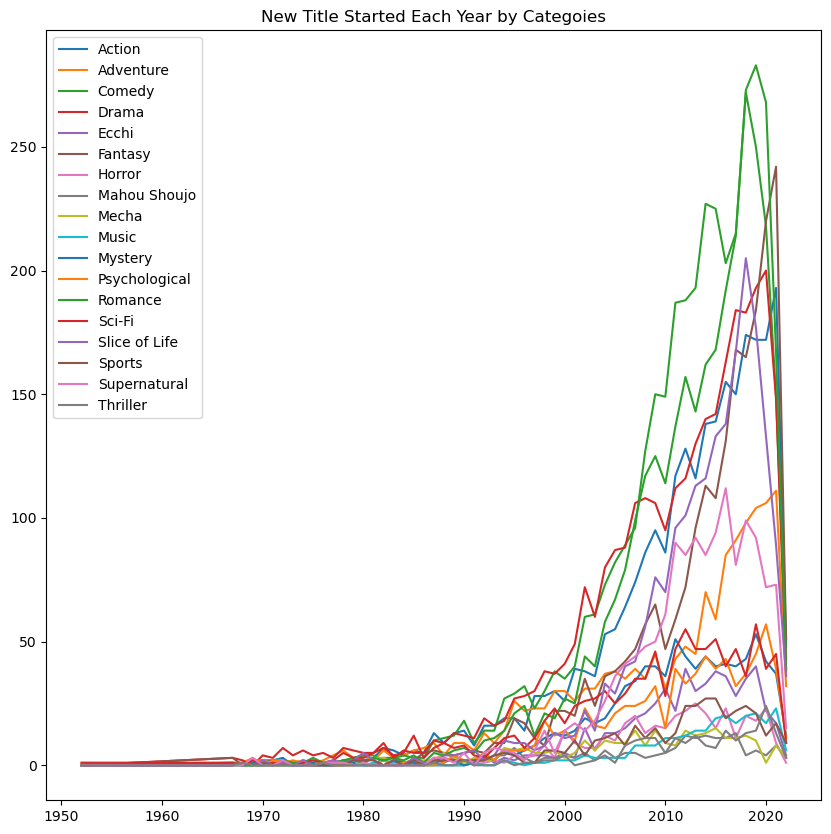

In [36]:
titles_df_ts_genre = titles_df_ts[[ 'Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi', 'Fantasy',
        'Horror', 'Mahou Shoujo', 'Mecha', 'Music', 'Mystery', 'Psychological',
       'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural',
       'Thriller']]

#colors = cm.rainbow(np.linspace(0, 1, len(titles_df_ts_genre.columns)))
plt.figure(figsize=(10,10))
plt.plot(titles_df_ts_genre)
plt.title('New Title Started Each Year by Categoies')
plt.legend(titles_df_ts_genre.columns)
plt.show()

# number of anime/manage initiated started to increase in 1990s
# Romance has the highest number

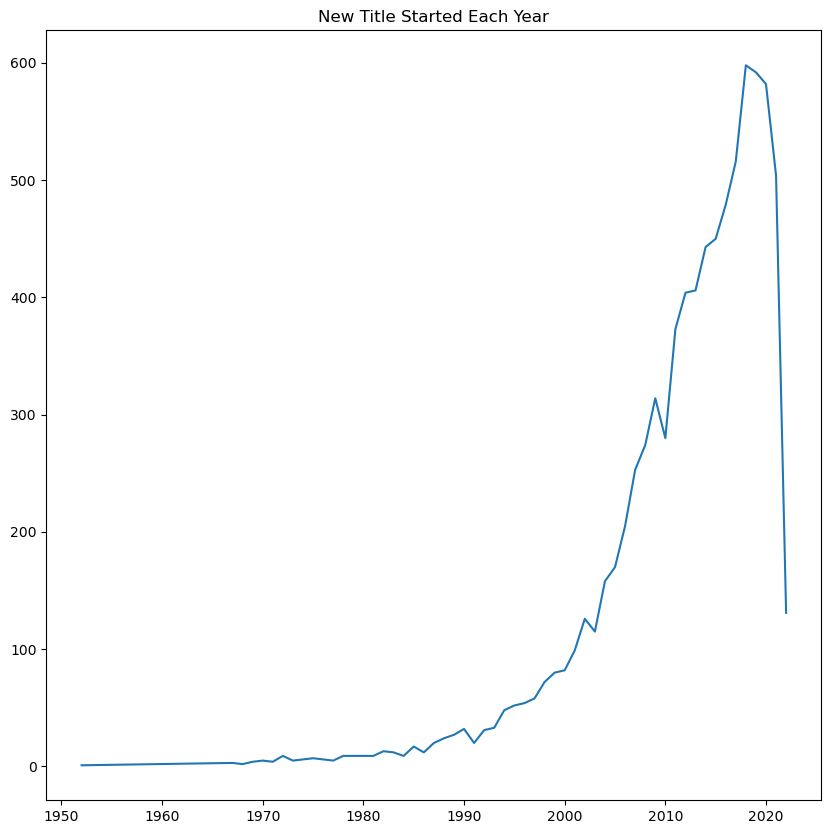

In [37]:
titles_df_years_count = titles_df['start_year'].value_counts()
titles_df_years_count.sort_index(axis=0, ascending=True, inplace=True)
plt.figure(figsize=(10,10))
plt.plot(titles_df_years_count)
plt.title('New Title Started Each Year')
plt.show()

# number of anime/manage initiated started to increase in 1990s
# Romance has the highest number

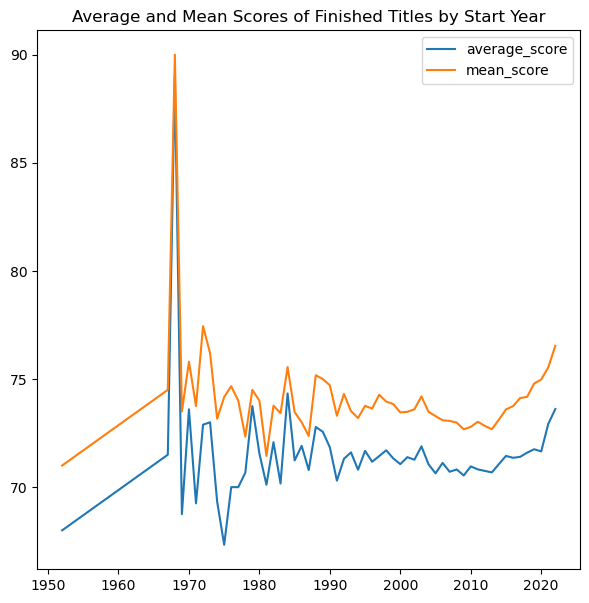

In [38]:
titles_df_ts_02 = titles_df[titles_df['publishing_status']=="FINISHED"]
titles_df_ts_02 = titles_df_ts_02.groupby('start_year').mean()
titles_df_ts_genre_02 = titles_df_ts_02[[ 'average_score', 'mean_score']]

#colors = cm.rainbow(np.linspace(0, 1, len(titles_df_ts_genre.columns)))
plt.figure(figsize=(7,7))
plt.plot(titles_df_ts_genre_02)
plt.title('Average and Mean Scores of Finished Titles by Start Year')
plt.legend(titles_df_ts_genre_02.columns)
plt.show()

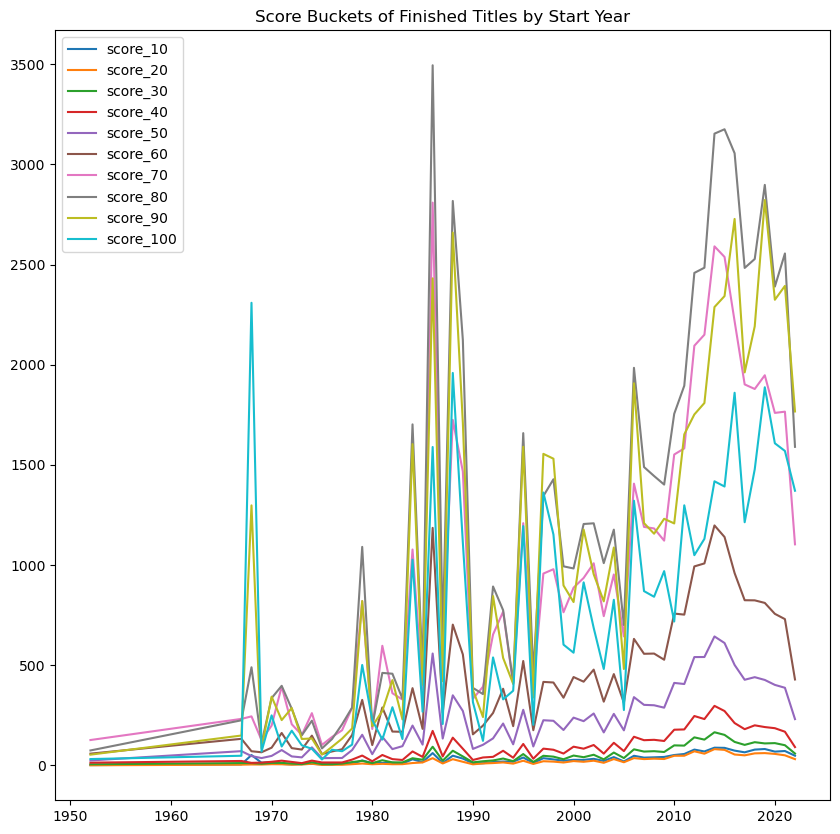

In [39]:
titles_df_ts_genre_02 = titles_df_ts_02[['score_10', 'score_20',
       'score_30', 'score_40', 'score_50', 'score_60', 'score_70', 'score_80',
       'score_90', 'score_100']]

#colors = cm.rainbow(np.linspace(0, 1, len(titles_df_ts_genre.columns)))
plt.figure(figsize=(10,10))
plt.plot(titles_df_ts_genre_02)
plt.title('Score Buckets of Finished Titles by Start Year')
plt.legend(titles_df_ts_genre_02.columns)
plt.show()

In [40]:
titles_df_manga = titles_df[titles_df['type']=="MANGA"]
titles_df_ts_manga = titles_df_manga[titles_df_manga['publishing_status']=="FINISHED"]
titles_df_ts_manga = titles_df_manga.groupby('start_year').mean()
titles_df_ts_manga

,title_id,duration,chapters,volume,adult,average_score,mean_score,popularity,favorites,score_10,...,Music,Mystery,Psychological,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,synopsis_wc
start_year,,,,,,,,,,,,,,,,,,,,,
1952.0,30728.000000,NaN,137.000000,23.000000,0.0,68.000000,71.000000,2376.000000,39.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,486.000000
1967.0,48442.000000,NaN,24.000000,5.666667,0.0,75.000000,77.666667,3572.333333,164.000000,6.000000,...,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,413.666667
1968.0,31300.500000,NaN,171.000000,20.000000,0.0,76.500000,82.000000,8713.000000,1066.500000,26.500000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.500000,438.000000
1969.0,41640.666667,NaN,286.000000,19.666667,0.0,69.666667,75.666667,1236.000000,46.000000,5.000000,...,0.000000,0.333333,0.666667,0.000000,0.666667,0.000000,0.000000,0.666667,0.000000,584.000000
1970.0,38439.250000,NaN,41.250000,8.500000,0.0,72.000000,74.750000,3538.250000,152.750000,2.666667,...,0.000000,0.250000,0.500000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,590.250000
1971.0,33192.666667,NaN,155.333333,22.666667,0.0,68.000000,73.666667,1183.000000,35.333333,1.666667,...,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,375.333333
1972.0,33859.777778,NaN,50.333333,7.444444,0.0,72.888889,77.444444,3906.555556,233.444444,5.666667,...,0.000000,0.111111,0.111111,0.222222,0.111111,0.111111,0.000000,0.222222,0.000000,361.555556
1973.0,36390.500000,NaN,81.500000,9.500000,0.0,73.500000,77.250000,2380.750000,92.750000,5.000000,...,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,571.500000
1974.0,49152.250000,NaN,14.000000,2.750000,0.0,69.000000,74.250000,1395.750000,59.000000,4.000000,...,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,553.000000


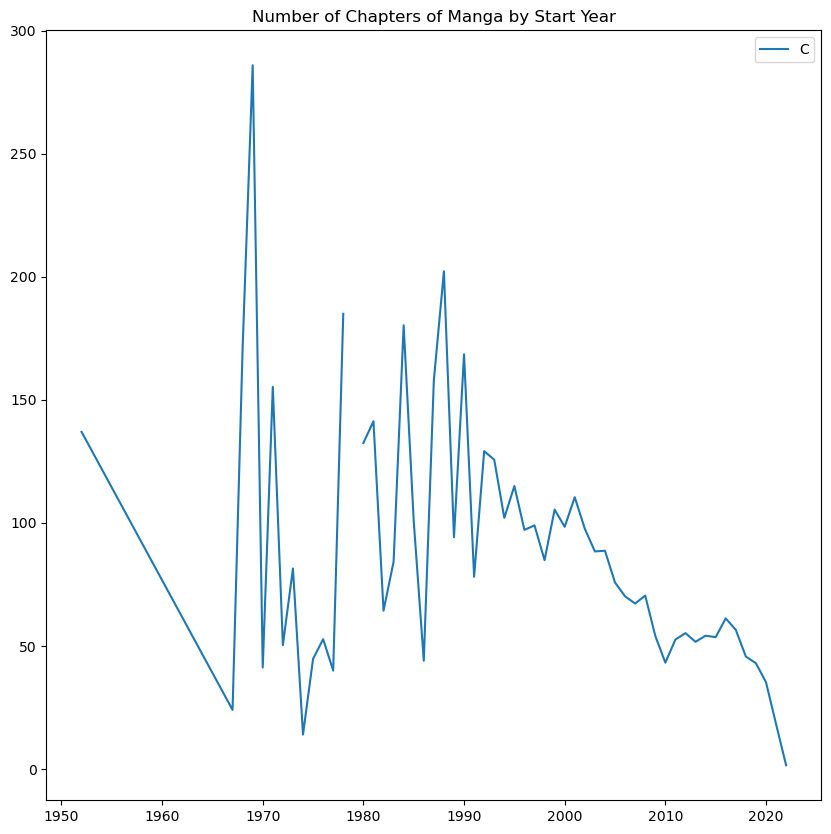

In [41]:
plt.figure(figsize=(10,10))
plt.plot(titles_df_ts_manga['chapters'])
plt.title('Number of Chapters of Manga by Start Year')
plt.legend('Chapters')
plt.show()

In [42]:
titles_df_anime = titles_df[titles_df['type']=="ANIME"]
titles_df_ts_anime = titles_df_anime[titles_df_anime['publishing_status']=="FINISHED"]
titles_df_ts_anime = titles_df_ts_anime.groupby('start_year').mean()
titles_df_ts_anime

,title_id,duration,chapters,volume,adult,average_score,mean_score,popularity,favorites,score_10,...,Music,Mystery,Psychological,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,synopsis_wc
start_year,,,,,,,,,,,,,,,,,,,,,
1969.0,5760.000000,26.000000,NaN,NaN,0.0,66.000000,67.000000,4674.000000,62.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,325.000000
1970.0,2402.000000,25.000000,NaN,NaN,0.0,80.000000,80.000000,19447.000000,598.000000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,367.000000
1971.0,1412.000000,25.000000,NaN,NaN,0.0,73.000000,74.000000,19410.000000,335.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000
1973.0,501.000000,25.000000,NaN,NaN,0.0,71.000000,72.000000,3786.000000,69.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,451.000000
1974.0,1937.500000,25.000000,NaN,NaN,0.0,70.000000,71.000000,6332.000000,125.000000,14.500000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,317.500000
1975.0,3626.000000,25.000000,NaN,NaN,0.0,68.000000,71.000000,1718.000000,43.500000,9.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000
1976.0,2231.500000,25.500000,NaN,NaN,0.0,70.500000,72.000000,3577.500000,89.500000,13.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,495.500000
1977.0,1774.000000,24.000000,NaN,NaN,0.0,71.333333,73.333333,4124.333333,111.333333,9.666667,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,501.000000
1978.0,1528.000000,39.428571,NaN,NaN,0.0,70.714286,72.142857,5194.428571,104.571429,10.285714,...,0.000000,0.285714,0.000000,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000,267.285714


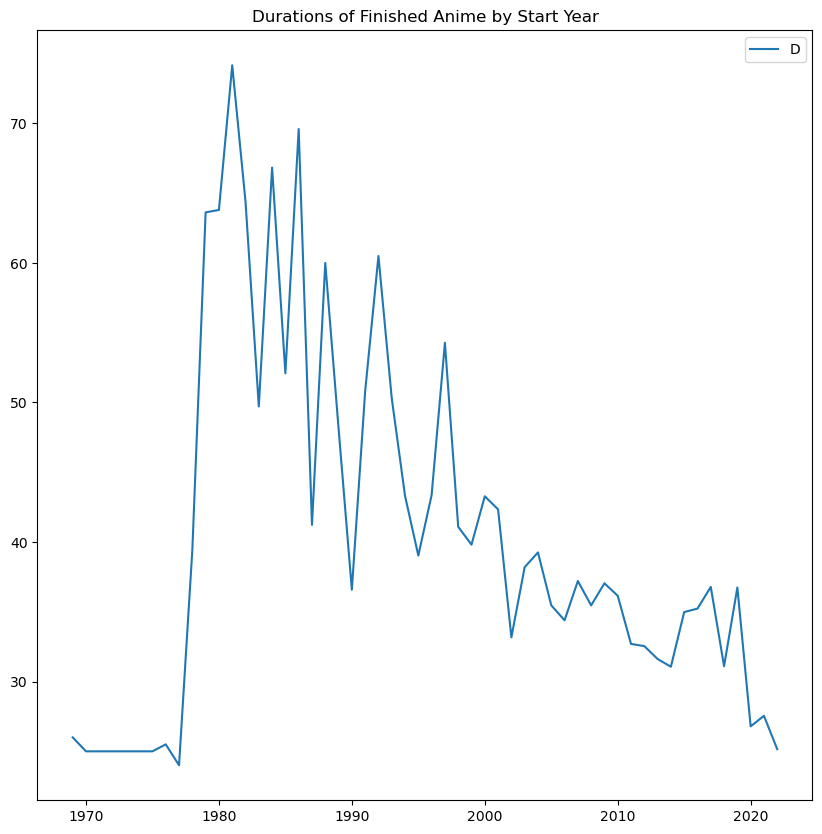

In [43]:
plt.figure(figsize=(10,10))
plt.plot(titles_df_ts_anime['duration'])
plt.title('Durations of Finished Anime by Start Year')
plt.legend('Duration')
plt.show()

In [44]:
categories = [ 'Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi', 'Fantasy', 
        'Horror', 'Mahou Shoujo', 'Mecha', 'Music', 'Mystery', 'Psychological',
       'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural',
       'Thriller']


titles_X_train = titles_df[[ 'Action', 'Adventure', 'Comedy', 'Drama', 'Ecchi', 'Fantasy', 
        'Horror', 'Mahou Shoujo', 'Mecha', 'Music', 'Mystery', 'Psychological',
       'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural',
       'Thriller']]

titles_y_train = titles_df['average_score']


In [45]:
#sns.relplot(x=titles_X_train, y=titles_df['Action'], data=titles_df)
titles_df

,title_id,title_english,title_romaji,type,duration,start_year,chapters,volume,publishing_status,country,...,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,title_romaji_type,synopsis_cleaned,synopsis_source,synopsis_wc,synopsis_cleaned_token
0,30002,Berserk,Berserk,MANGA,NaN,1989.0,NaN,NaN,RELEASING,JP,...,0,0,0,0,0,Berserk_MANGA,His name Guts Black Swordsman feared warrior s...,Dark Horse,425,"[name, feared, warrior, spoken, whispers, giga..."
1,31706,NaN,JoJo no Kimyou na Bouken: Steel Ball Run,MANGA,NaN,2004.0,95.0,24.0,FINISHED,JP,...,0,0,1,1,0,JoJo no Kimyou na Bouken: Steel Ball Run_MANGA,Originally presented unrelated story series la...,Wikipedia,346,"[presented, unrelated, story, series, later, o..."
2,114129,Gintama: THE VERY FINAL,Gintama: THE FINAL,ANIME,104.0,2021.0,NaN,NaN,FINISHED,JP,...,1,0,0,0,0,Gintama: THE FINAL_ANIME,Gintama THE FINAL rd final film adaptation rem...,no match,82,"[rd, final, film, adaptation, remainder, arc, ..."
3,30013,One Piece,ONE PIECE,MANGA,NaN,1997.0,NaN,NaN,RELEASING,JP,...,0,0,0,0,0,ONE PIECE_MANGA,As child Monkey D Luffy inspired become pirate...,Viz Media,348,"[child, inspired, become, pirate, listening, t..."
4,124194,Fruits Basket The Final Season,Fruits Basket: The Final,ANIME,24.0,2021.0,NaN,NaN,FINISHED,JP,...,0,1,0,1,0,Fruits Basket: The Final_ANIME,After last season revelations Soma family move...,Funimation,277,"[last, season, revelations, family, moves, for..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,30249,The Day of Revolution,Kakumei no Hi,MANGA,NaN,1998.0,10.0,2.0,FINISHED,JP,...,0,0,0,0,0,Kakumei no Hi_MANGA,Meet Megumi She petite adorable total eye catc...,Digital Manga Publishing,322,"[petite, total, eye, catcher, fact, reminds, a..."
8781,68111,NaN,Chimoguri Ringo to Kingyobachi Otoko,MANGA,NaN,2010.0,27.0,3.0,FINISHED,JP,...,0,0,0,1,0,Chimoguri Ringo to Kingyobachi Otoko_MANGA,A terrible creature plaguing community man fis...,MangaUpdates & MyAnimeList,650,"[terrible, creature, plaguing, community, man,..."
8783,86018,NaN,Katappashi Kara Zenbu Koi,MANGA,NaN,2012.0,7.0,1.0,FINISHED,JP,...,0,0,0,0,0,Katappashi Kara Zenbu Koi_MANGA,Out blue childhood friend Takaoka confesses Iw...,no match,192,"[blue, childhood, friend, confesses, popular, ..."
8784,103948,NaN,WiSH VOYAGE,ANIME,3.0,2018.0,NaN,NaN,FINISHED,JP,...,0,0,0,0,0,WiSH VOYAGE_ANIME,Official music video IDOLiSH song WiSH VOYAGE ...,no match,70,"[music, video, song, also, released, album, name]"


In [46]:
titles_df.loc[:, ~titles_df.columns.isin(['review_id', 'title_id'])].groupby('title_romaji').mean().sort_values('mean_score', ascending=False).index[0:20]

Index(['Fata Morgana no Yakata: Anata no Genten ni Itaru Monogatari',
       'Koimonogatari', 'Berserk', 'Bungou Stray Dogs: STORM BRINGER',
       'Gintama: THE FINAL',
       'Hitokui Magical: Satsuriku Kijutsu no Niounomiya Kyoudai',
       'JoJo no Kimyou na Bouken: Steel Ball Run', 'Fruits Basket: The Final',
       'Vagabond', 'Kizumonogatari', 'Gintama°',
       'Kubishime Romanticist: Ningen Shikkaku - Zerozaki Hitoshiki',
       'Nekomonogatari: Shiro', 'Nekosogi Radical',
       'Bungou Stray Dogs: Dazai Osamu to Kuro no Jidai',
       'Shingeki no Kyojin 3 Part 2',
       'Kaguya-sama wa Kokurasetai: Ultra Romantic',
       'Bungou Stray Dogs: Dazai, Chuuya, Juugosai', 'Real', 'Nademonogatari'],
      dtype='object', name='title_romaji')

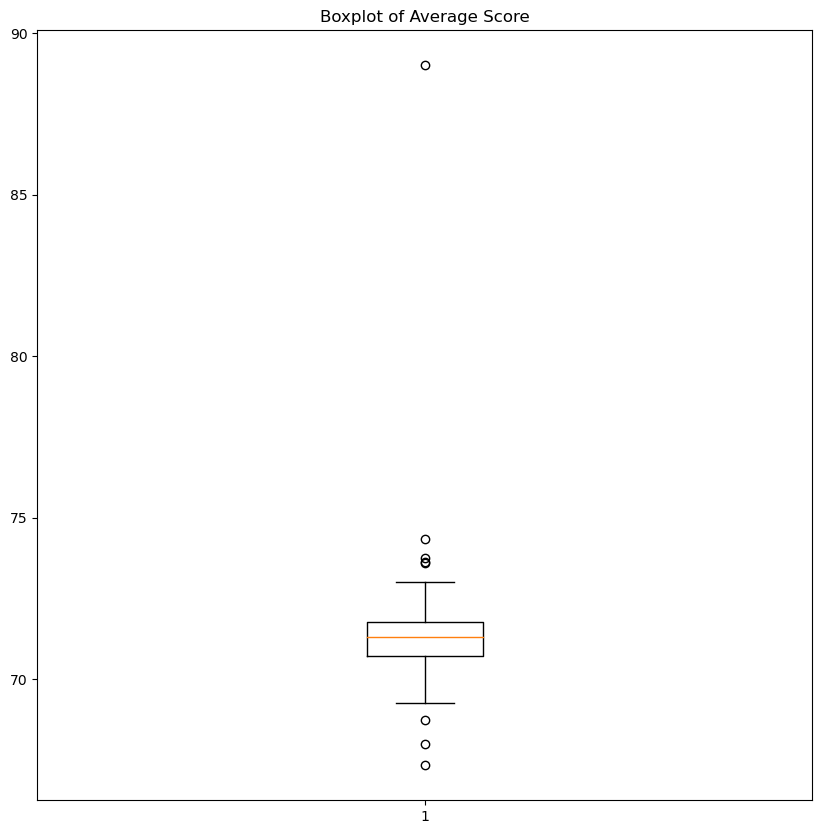

In [47]:
plt.figure(figsize=(10,10))
plt.boxplot(titles_df_ts_02['average_score'])
plt.title('Boxplot of Average Score')
plt.show()

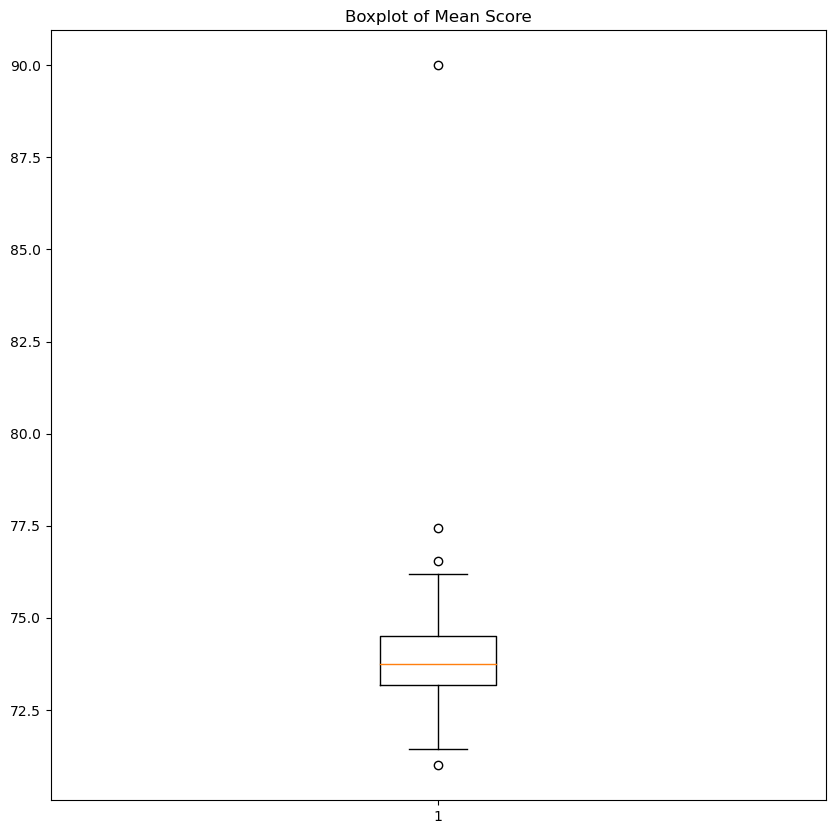

In [48]:
plt.figure(figsize=(10,10))
plt.boxplot(titles_df_ts_02['mean_score'])
plt.title('Boxplot of Mean Score')
plt.show()

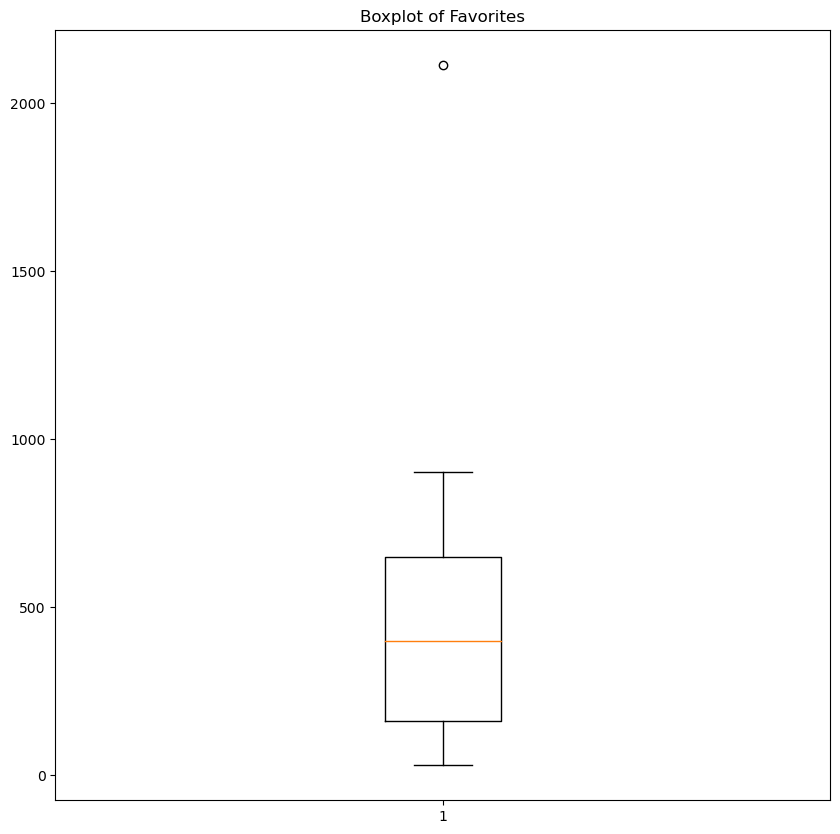

In [49]:
plt.figure(figsize=(10,10))
plt.boxplot(titles_df_ts_02['favorites'])
plt.title('Boxplot of Favorites')
plt.show()

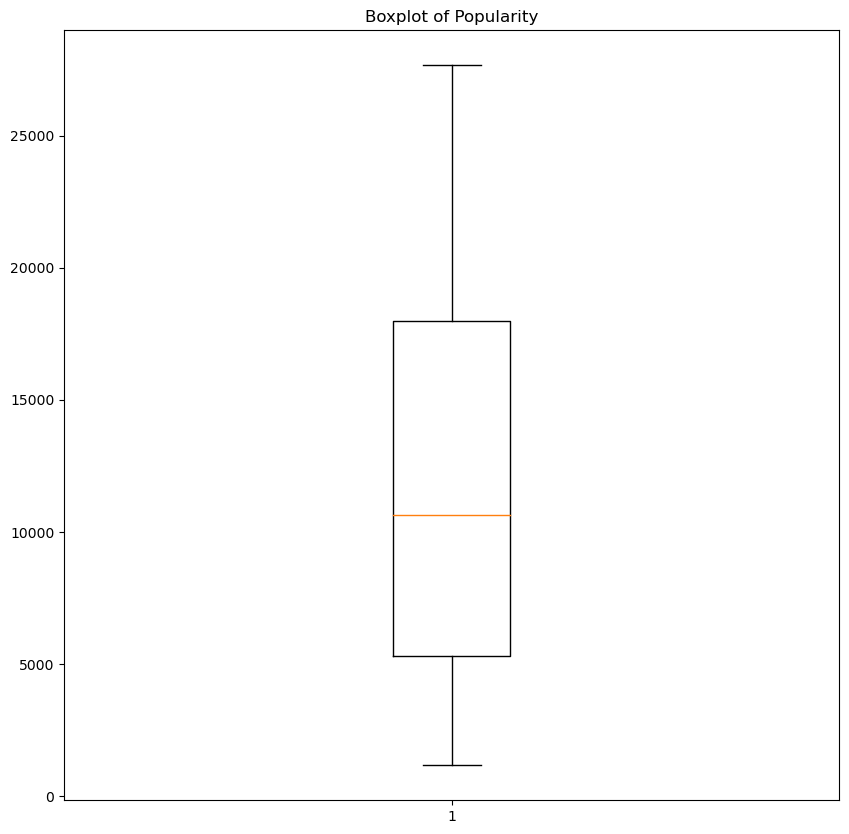

In [50]:
plt.figure(figsize=(10,10))
plt.boxplot(titles_df_ts_02['popularity'])
plt.title('Boxplot of Popularity')
plt.show()

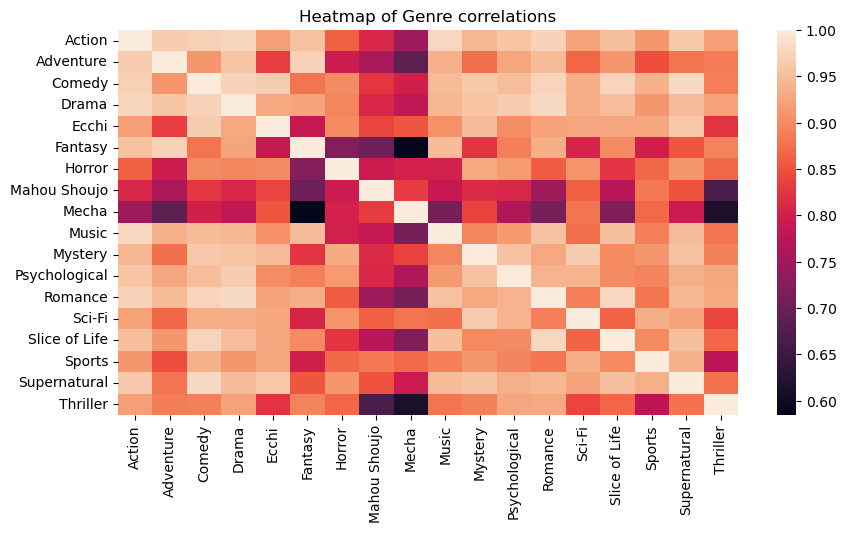

In [51]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(titles_df_ts_genre.corr())
plt.title('Heatmap of Genre correlations')
plt.show()


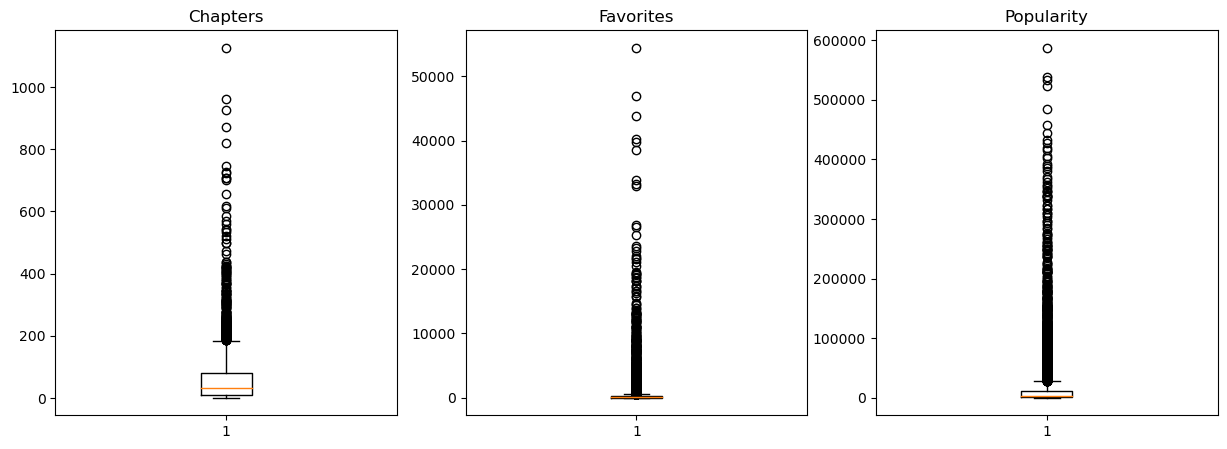

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
title_df_chapter_filtered = titles_df['chapters'][~np.isnan(titles_df['chapters'])]
axs[0].boxplot(title_df_chapter_filtered)
axs[0].set_title('Chapters')
axs[1].boxplot(titles_df['favorites'])
axs[1].set_title('Favorites')
axs[2].boxplot(titles_df['popularity'])
axs[2].set_title('Popularity')
fig

In [60]:
titles_df.sort_values('duration', ascending=False)

,title_id,title_english,title_romaji,type,duration,start_year,chapters,volume,publishing_status,country,...,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,title_romaji_type,synopsis_cleaned,synopsis_source,synopsis_wc,synopsis_cleaned_token
2379,112135,NaN,Kono Sekai no (Sara ni Ikutsumono) Katasumi ni,ANIME,168.0,2019.0,NaN,NaN,FINISHED,JP,...,0,1,0,0,0,Kono Sekai no (Sara ni Ikutsumono) Katasumi ni...,Suzu quiet ordinary bit clumsy daydreaming gir...,Anime News Network,774,"[quiet, ordinary, bit, clumsy, daydreaming, gi..."
108,7311,The Disappearance of Haruhi Suzumiya,Suzumiya Haruhi no Shoushitsu,ANIME,162.0,2010.0,NaN,NaN,FINISHED,JP,...,1,0,0,1,0,Suzumiya Haruhi no Shoushitsu_ANIME,It mid December SOS Brigade chief Haruhi Suzum...,Anime News Network,494,"[mid, chief, announces, going, hold, party, di..."
1826,2448,Ghost in the Shell: S.A.C. 2nd GIG - Individua...,Koukaku Kidoutai: Stand Alone Complex 2nd GIG ...,ANIME,161.0,2006.0,NaN,NaN,FINISHED,JP,...,1,0,0,0,0,Koukaku Kidoutai: Stand Alone Complex 2nd GIG ...,Compilation movie Individual Eleven story Ghos...,AniDB,71,"[movie, story, nd, series]"
1710,2449,Ghost in the Shell: Stand Alone Complex - The ...,Koukaku Kidoutai: Stand Alone Complex - The La...,ANIME,160.0,2005.0,NaN,NaN,FINISHED,JP,...,1,0,0,0,0,Koukaku Kidoutai: Stand Alone Complex - The La...,In terrorist incident known The Laughing Man I...,Anime News Network,553,"[terrorist, incident, known, occurred, preside..."
94,3786,Evangelion: 3.0+1.0 Thrice Upon a Time,Shin Evangelion Movie:||,ANIME,155.0,2021.0,NaN,NaN,FINISHED,JP,...,1,0,0,0,0,Shin Evangelion Movie:||_ANIME,In aftermath Fourth Impact stranded without Ev...,no match,384,"[aftermath, stranded, without, find, refuge, o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,30117,.hack//Legend of the Twilight,.hack//Tasogare no Udewa Densetsu,MANGA,NaN,2002.0,22.0,3.0,FINISHED,JP,...,1,0,0,0,0,.hack//Tasogare no Udewa Densetsu_MANGA,Welcome The World advanced online game ever cr...,Tokyopop,327,"[advanced, online, game, ever, created, anyone..."
8780,30249,The Day of Revolution,Kakumei no Hi,MANGA,NaN,1998.0,10.0,2.0,FINISHED,JP,...,0,0,0,0,0,Kakumei no Hi_MANGA,Meet Megumi She petite adorable total eye catc...,Digital Manga Publishing,322,"[petite, total, eye, catcher, fact, reminds, a..."
8781,68111,NaN,Chimoguri Ringo to Kingyobachi Otoko,MANGA,NaN,2010.0,27.0,3.0,FINISHED,JP,...,0,0,0,1,0,Chimoguri Ringo to Kingyobachi Otoko_MANGA,A terrible creature plaguing community man fis...,MangaUpdates & MyAnimeList,650,"[terrible, creature, plaguing, community, man,..."
8783,86018,NaN,Katappashi Kara Zenbu Koi,MANGA,NaN,2012.0,7.0,1.0,FINISHED,JP,...,0,0,0,0,0,Katappashi Kara Zenbu Koi_MANGA,Out blue childhood friend Takaoka confesses Iw...,no match,192,"[blue, childhood, friend, confesses, popular, ..."
